In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

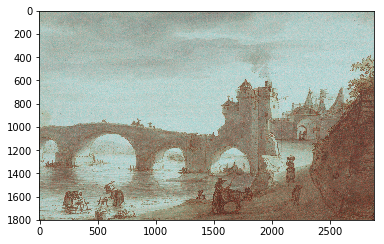

In [16]:
I = np.array(Image.open('image.png'))
plt.imshow(I)

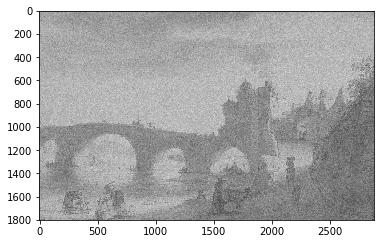

In [17]:
R = I[:, :, 0]
G = I[:, :, 1]
B = I[:, :, 2]
plt.imshow(R, cmap='gray')

[[  6.16751649   7.89132482   7.5930945  ...,   7.60754694   6.55814593
    6.86158375]
 [  5.28003851   7.31236721  11.8882714  ...,  11.88960003  11.89989017
    7.72735078]
 [  7.55871548   7.74601298  11.89973807 ...,  11.89721064   7.62481338
    7.37768098]
 ..., 
 [  7.97112332   7.8076823    7.92541333 ...,  11.90078912   8.65128348
    9.22838196]
 [  8.06020216  11.89626167  11.89575601 ...,  11.90391007   8.86873701
    9.45765198]
 [  7.97365783   7.59029407   7.13820148 ...,   8.32822549   8.49073623
    8.13401461]]


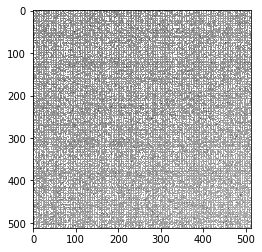

In [33]:
z = np.fft.fft2(R)
q = np.fft.fftshift(z)
N = 512
m = np.log(np.abs(q))[:N, :N] # magnitude_q
x_scaled = np.uint8(255 * (m - m.min()) / (m.max() - m.min()))
print(m)
plt.imshow(m, cmap='gray')

In [36]:
def reverse_bits_pas_shift(v):
    v = ((v >>  1) & 0x55555555) | ((v & 0x55555555) <<  1) # swap odd and even bits
    v = ((v >>  2) & 0x33333333) | ((v & 0x33333333) <<  2) # swap consecutive pairs
    v = ((v >>  4) & 0x0F0F0F0F) | ((v & 0x0F0F0F0F) <<  4) # swap nibbles ... 
    v = ((v >>  8) & 0x00FF00FF) | ((v & 0x00FF00FF) <<  8) # swap bytes
    v = ( v >> 16              ) | ( v               << 16) # swap 2-byte long pairs
    return v >> 23

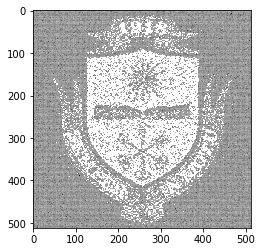

In [37]:
reversed_image = np.zeros((N, N))
for i in range(reversed_image.shape[0]):
    for j in range(reversed_image.shape[1]):
        i_new = reverse_bits_pas_shift(i)
        j_new = reverse_bits_pas_shift(j)
        reversed_image[i_new, j_new] = m[i, j];
plt.imshow(reversed_image, cmap='gray')